In [67]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df.duplicated().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [72]:
df=df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
for i in df.columns:
    print(i)
    print()
    print(set(df[i].to_list()))
    print('*'*100)

gender

{'Male', 'Female'}
****************************************************************************************************
SeniorCitizen

{0, 1}
****************************************************************************************************
Partner

{'No', 'Yes'}
****************************************************************************************************
Dependents

{'No', 'Yes'}
****************************************************************************************************
tenure

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
****************************************************************************************************
PhoneService

{'No', 'Yes'}
******************************************************************************

In [74]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [75]:
df['TotalCharges'].mode()

0        
1    20.2
Name: TotalCharges, dtype: object

In [76]:
df['TotalCharges']=np.where(df['TotalCharges']==' ','20.2',df['TotalCharges'])

In [77]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Figure size 1000x800 with 0 Axes>

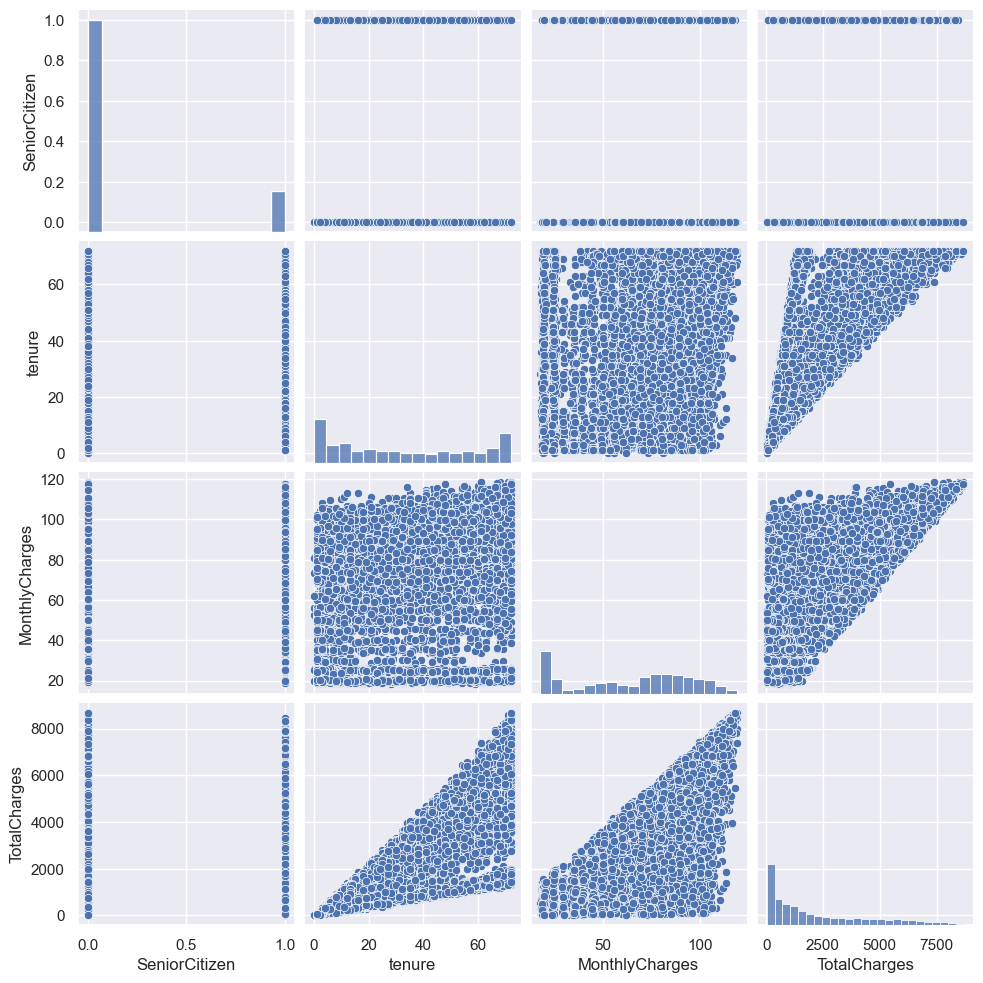

In [79]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

<Figure size 1200x1000 with 0 Axes>

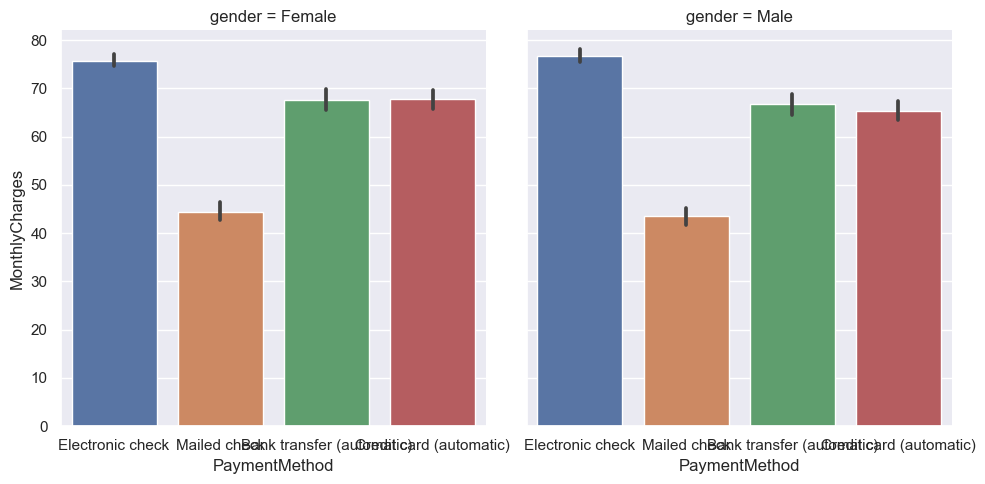

In [97]:
plt.figure(figsize=(12,10))
sns.catplot(data=df,x='PaymentMethod',y='MonthlyCharges',kind='bar',col='gender')
plt.show()

In [89]:
X=df.groupby('gender')['MonthlyCharges'].max().sort_values(ascending=False).head()
X

gender
Female    118.75
Male      118.35
Name: MonthlyCharges, dtype: float64

In [85]:
Y=df.groupby('PaymentMethod')['MonthlyCharges'].max().sort_values(ascending=False).head()
Y

PaymentMethod
Bank transfer (automatic)    118.75
Electronic check             118.65
Mailed check                 118.60
Credit card (automatic)      117.50
Name: MonthlyCharges, dtype: float64

In [86]:
Z=df.groupby('PaymentMethod')['TotalCharges'].max().sort_values(ascending=False).head()
Z

PaymentMethod
Bank transfer (automatic)    8684.80
Credit card (automatic)      8670.10
Electronic check             8564.75
Mailed check                 8331.95
Name: TotalCharges, dtype: float64

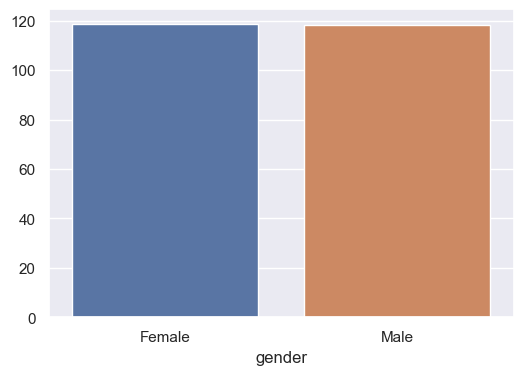

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x=X.index,y=X.values)
plt.show()

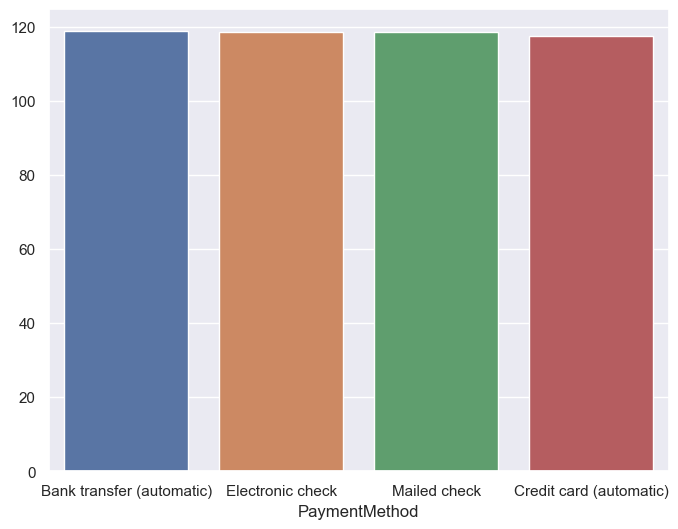

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x=Y.index,y=Y.values)
plt.show()

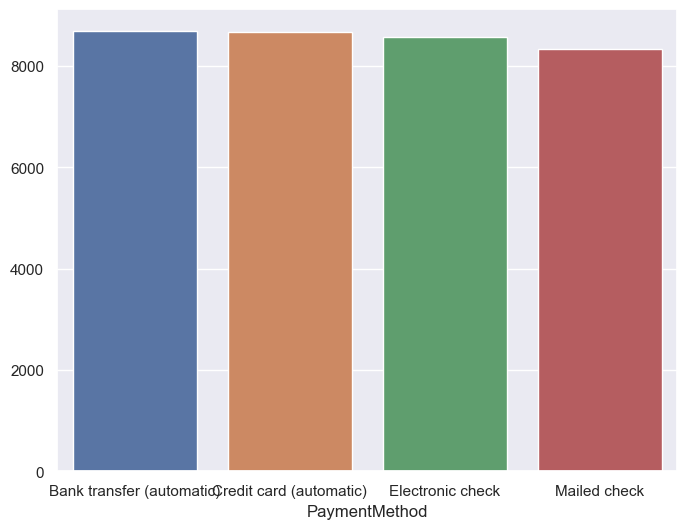

In [95]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x=Z.index,y=Z.values)
plt.show()

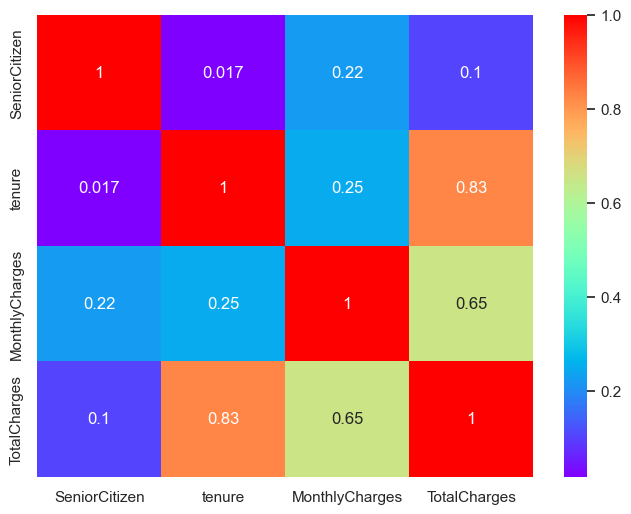

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [98]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
cat_col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
        'Churn']
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [100]:
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [101]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [102]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [103]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [104]:
ros=RandomOverSampler()
x_sam,y_sam=ros.fit_resample(x,y)

In [105]:
print('Previous value of y: ',y.value_counts())
print('Current value of y: ',y_sam.value_counts())

Previous value of y:  0    5174
1    1869
Name: Churn, dtype: int64
Current value of y:  0    5174
1    5174
Name: Churn, dtype: int64


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_sam,y_sam,test_size=0.20,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8278, 19) (2070, 19) (8278,) (2070,)


In [107]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [108]:
def models(model):
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    print(confusion_matrix(y_train,pred_train))
    print(confusion_matrix(y_test,pred_test))
    print()
    print(classification_report(y_train,pred_train))
    print(classification_report(y_test,pred_test))
    print()
    print(accuracy_score(y_train,pred_train))
    print(accuracy_score(y_test,pred_test))

In [109]:
bagg=BaggingClassifier()
bagg.fit(x_train,y_train)

BaggingClassifier()

In [110]:
models(bagg)

[[4086   36]
 [  28 4128]]
[[900 152]
 [135 883]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4122
           1       0.99      0.99      0.99      4156

    accuracy                           0.99      8278
   macro avg       0.99      0.99      0.99      8278
weighted avg       0.99      0.99      0.99      8278

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1052
           1       0.85      0.87      0.86      1018

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


0.9922686639284851
0.8613526570048309


In [111]:
cvs=cross_val_score(bagg,x_train,y_train,cv=10)
print('10 Accuracy is: ',cvs)
print('Avg Accuracy is: ',cvs.mean())
print('Max Accuracy is: ',cvs.max())

10 Accuracy is:  [0.87801932 0.87318841 0.89130435 0.86956522 0.86714976 0.89975845
 0.87318841 0.87560386 0.86577993 0.86577993]
Avg Accuracy is:  0.8759337632674997
Max Accuracy is:  0.8997584541062802
